# Table of Contents

1. Import Necessary Libraries 📚
2. Load and Explore the Dataset 🔍
   2.1 Basic Information
   2.2 Missing Values Analysis
   2.3 Summary Statistics
3. Exploratory Data Analysis (EDA) 📊
   3.1 Univariate Analysis
       3.1.1 Salary Distribution
       3.1.2 Work Year Distribution
       3.1.3 Experience Level Breakdown
       3.1.4 Employment Type Overview
       3.1.5 Job Title Distribution
       3.1.6 Employee Residence Distribution
       3.1.7 Company Location Breakdown
       3.1.8 Company Size Analysis
       3.1.9 Key Takeaways from Univariate Analysis
   3.2 Multivariate Analysis
       3.2.1 Work Year vs Salary
       3.2.2 Experience Level vs Salary
       3.2.3 Employment Type vs Salary
       3.2.4 Job Title vs Salary
       3.2.5 Employee Residence vs Salary
       3.2.6 Company Size vs Salary
       3.2.7 Company Location vs Salary
       3.2.8 Company Size vs Salary
   3.3 Bonus
       Job Title Recommendation for Entry-level Candidates
5. Feature Engineering ⚙️
   4.1 Encoding Categorical Variables
   4.2 Creating New Features
   4.3 Handling Skewed Data
6. Modeling 🔎
   5.1 Preprocessing Data for Modeling
   5.2 Splitting Data into Train and Test Sets
   5.3 Model Selection and Evaluation
       5.3.1 Linear Regression
       5.3.2 Ridge & Lasso Regression
       5.3.3 Random Forest Regression
       5.3.4 XGBoost Regression
   5.4 Hyperparameter Tuning
   5.5 Feature Importance Analysis
   5.6 Comparing Model Performance
   5.7 Final Model Selection and Insights
7. Conclusion & Business Insights 💡
   6.1 Key Findings
   6.2 Salary Trends & Drivers
   6.3 Recommendations for Job Seekers & Employers
   6.4 Limitations & Future Improvements


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Data Science Job Salaries.csv")

In [6]:
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
df.shape

(607, 12)

In [8]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [9]:
#Dataset Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [10]:
# Check to see if there are any missing values in our data set
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
#check duplicate rows
df.duplicated().sum()

0

In [12]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [13]:
## Drop the unnamed Column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
# Unique values per column
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values per column:
work_year: 3 unique values
experience_level: 4 unique values
employment_type: 4 unique values
job_title: 50 unique values
salary: 272 unique values
salary_currency: 17 unique values
salary_in_usd: 369 unique values
employee_residence: 57 unique values
remote_ratio: 3 unique values
company_location: 50 unique values
company_size: 3 unique values


## Univariate Analysis

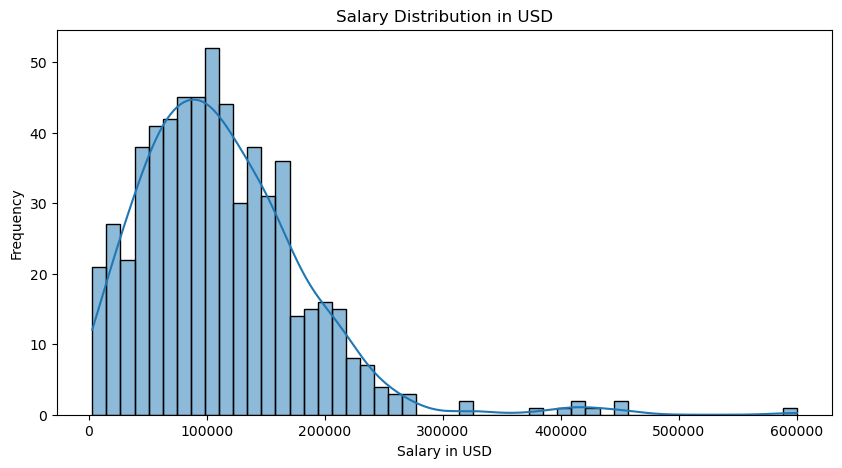

In [16]:
# Salary distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Salary Distribution in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

Insights:
- The salary distribution for data science professionals is right-skewed, with a majority of professionals earning lower to mid-range salaries.
- A noticeable peak in the distribution suggests a concentration of professionals within a specific salary range.

C:\Users\himan\AppData\Local\Temp\ipykernel_11464\2294043270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['work_year'], palette='viridis')


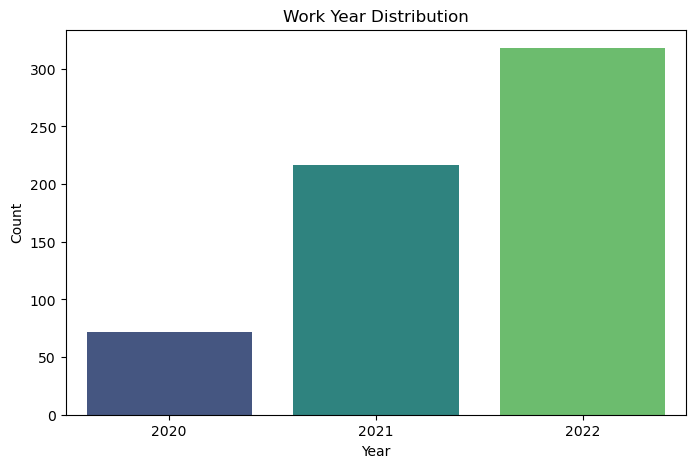

In [18]:
#Work Year Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['work_year'], palette='viridis')
plt.title('Work Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


In [19]:
#  Replace values in experience-level column
df['experience_level'] = df['experience_level'].replace('EN', 'Entry-Level')
df['experience_level'] = df['experience_level'].replace('EX', 'Experienced')
df['experience_level'] = df['experience_level'].replace('MI', 'Mid-Level')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior')

C:\Users\himan\AppData\Local\Temp\ipykernel_11464\2875698707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['experience_level'], palette='coolwarm')


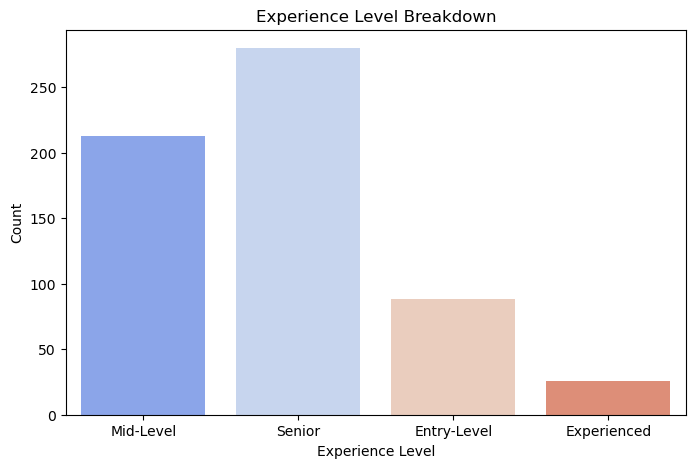

In [125]:
#Experience Level Breakdown
plt.figure(figsize=(8, 5))
sns.countplot(x=df['experience_level'], palette='coolwarm')
plt.title('Experience Level Breakdown')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

In [21]:
#Replace values in employment_type column
df['employment_type'] = df['employment_type'].replace('FT', 'Full-Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contractor')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')
df['employment_type'] = df['employment_type'].replace('PT', 'Part-Time')

C:\Users\himan\AppData\Local\Temp\ipykernel_11464\1644355876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['employment_type'], palette='Set2')


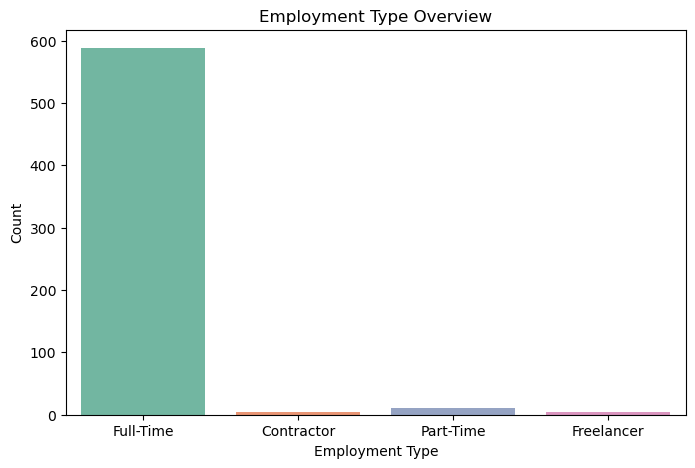

In [22]:
#Employment Type Overview
plt.figure(figsize=(8, 5))
sns.countplot(x=df['employment_type'], palette='Set2')
plt.title('Employment Type Overview')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()


C:\Users\himan\AppData\Local\Temp\ipykernel_11464\1072765882.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='Blues_r')


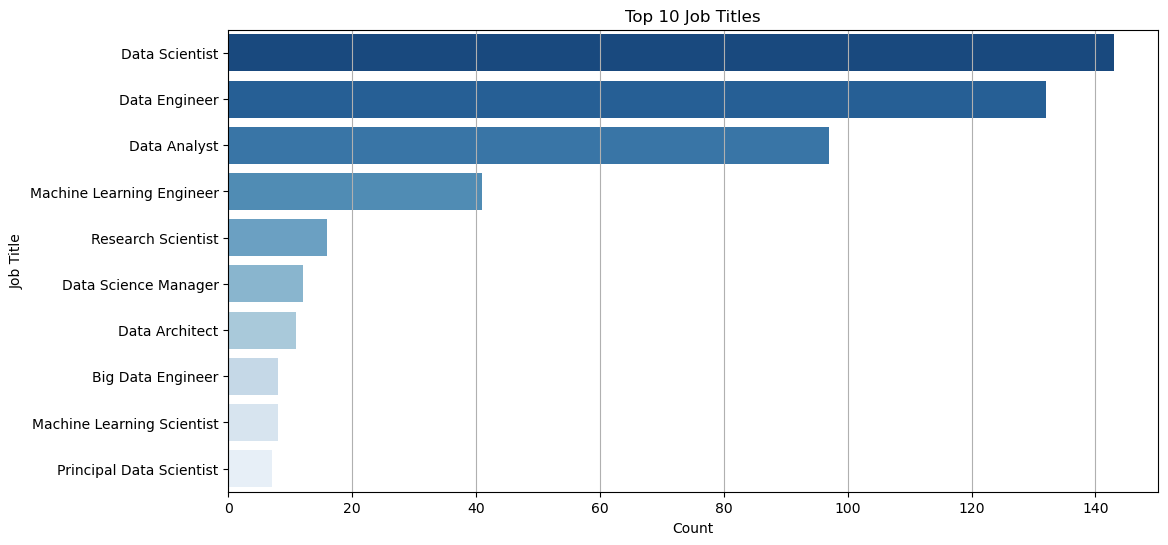

In [23]:
# Job Title Distribution
plt.figure(figsize=(12, 6))
top_jobs = df['job_title'].value_counts().nlargest(10)  # Top 10 job titles
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='Blues_r')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.grid(axis='x')
plt.show()


C:\Users\himan\AppData\Local\Temp\ipykernel_11464\4091166153.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


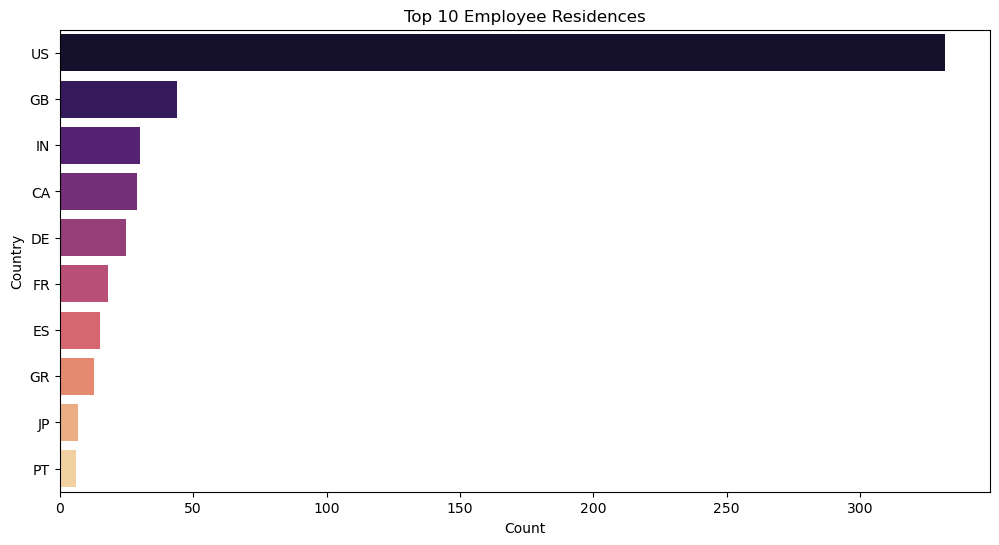

In [24]:
#Employee Residence Distribution
plt.figure(figsize=(12, 6))
top_countries = df['employee_residence'].value_counts().nlargest(10)  # Top 10 countries
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Employee Residences')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


C:\Users\himan\AppData\Local\Temp\ipykernel_11464\2771342289.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_company_locations.values, y=top_company_locations.index, palette='crest')


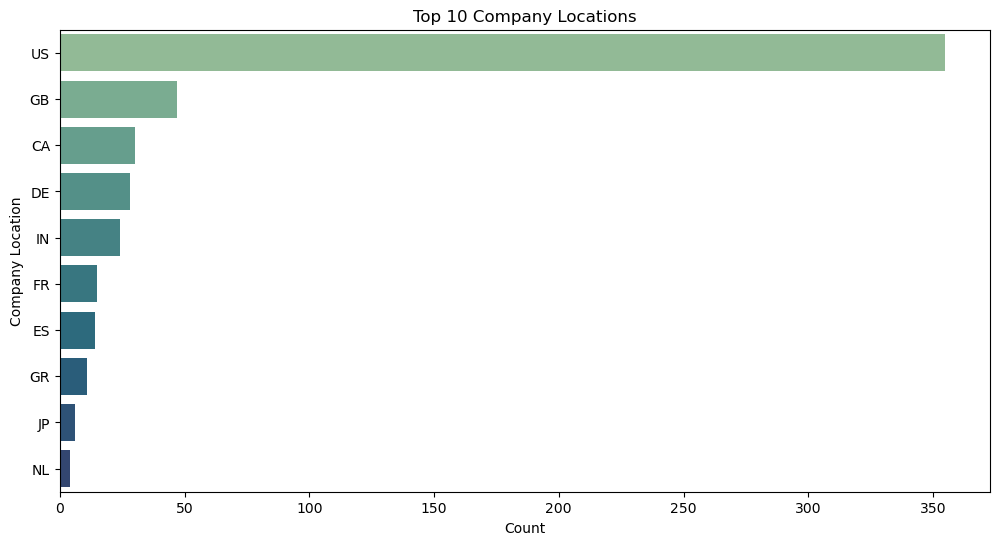

In [25]:
#Company Location Breakdown
plt.figure(figsize=(12, 6))
top_company_locations = df['company_location'].value_counts().nlargest(10)  # Top 10 company locations
sns.barplot(x=top_company_locations.values, y=top_company_locations.index, palette='crest')
plt.title('Top 10 Company Locations')
plt.xlabel('Count')
plt.ylabel('Company Location')
plt.show()


C:\Users\himan\AppData\Local\Temp\ipykernel_11464\2528685349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['company_size'], order=['S', 'M', 'L'], palette='pastel')


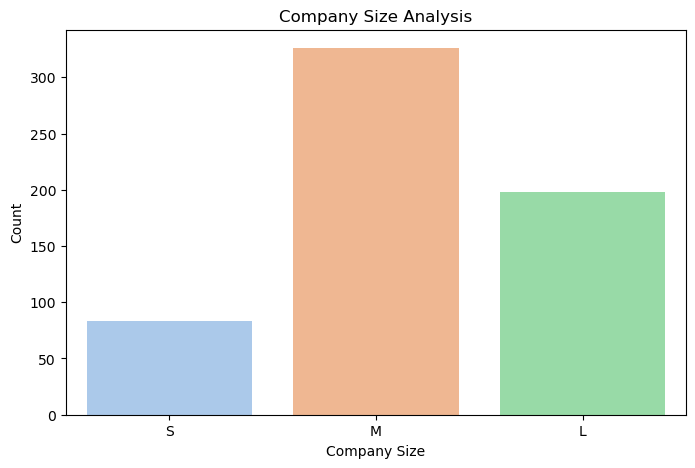

In [26]:
#Company Size Analysis
plt.figure(figsize=(8, 5))
sns.countplot(x=df['company_size'], order=['S', 'M', 'L'], palette='pastel')
plt.title('Company Size Analysis')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()


In [27]:
# Key Takeaways from Univariate Analysis
print("Key Takeaways:")
print("1. Average Salary: ", df['salary_in_usd'].mean())
print("2. Most Common Work Year: ", df['work_year'].mode()[0])
print("3. Most Common Experience Level: ", df['experience_level'].mode()[0])
print("4. Most Common Employment Type: ", df['employment_type'].mode()[0])
print("5. Most Common Job Title: ", df['job_title'].mode()[0])
print("6. Most Common Employee Residence: ", df['employee_residence'].mode()[0])
print("7. Most Common Remote Work Ratio: ", df['remote_ratio'].mode()[0])
print("8. Most Common Company Location: ", df['company_location'].mode()[0])
print("9. Most Common Company Size: ", df['company_size'].mode()[0])


Key Takeaways:
1. Average Salary:  112297.86985172982
2. Most Common Work Year:  2022
3. Most Common Experience Level:  Senior
4. Most Common Employment Type:  Full-Time
5. Most Common Job Title:  Data Scientist
6. Most Common Employee Residence:  US
7. Most Common Remote Work Ratio:  100
8. Most Common Company Location:  US
9. Most Common Company Size:  M


## Multivariate Analysis

C:\Users\himan\AppData\Local\Temp\ipykernel_11464\218183392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['work_year'], y=df['salary_in_usd'], palette='coolwarm')


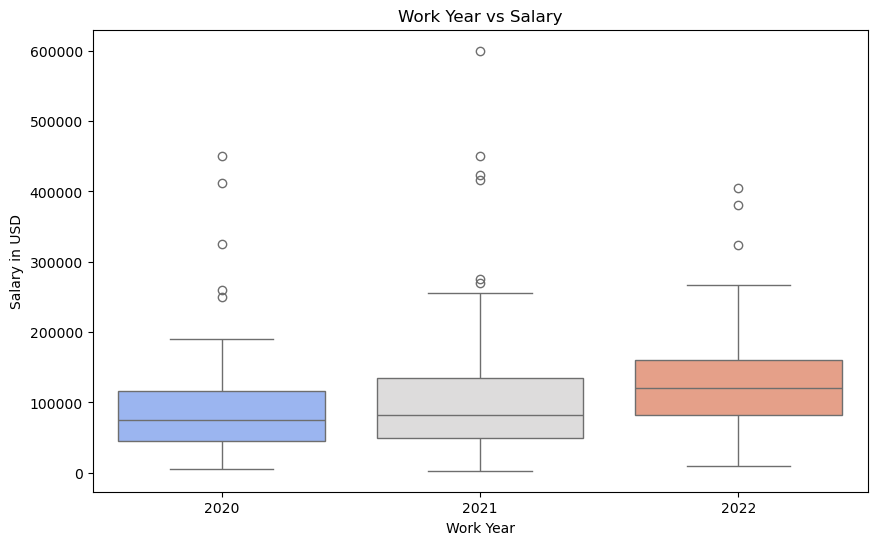

In [29]:
#Work Year vs Salary
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['work_year'], y=df['salary_in_usd'], palette='coolwarm')
plt.title('Work Year vs Salary')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.show()


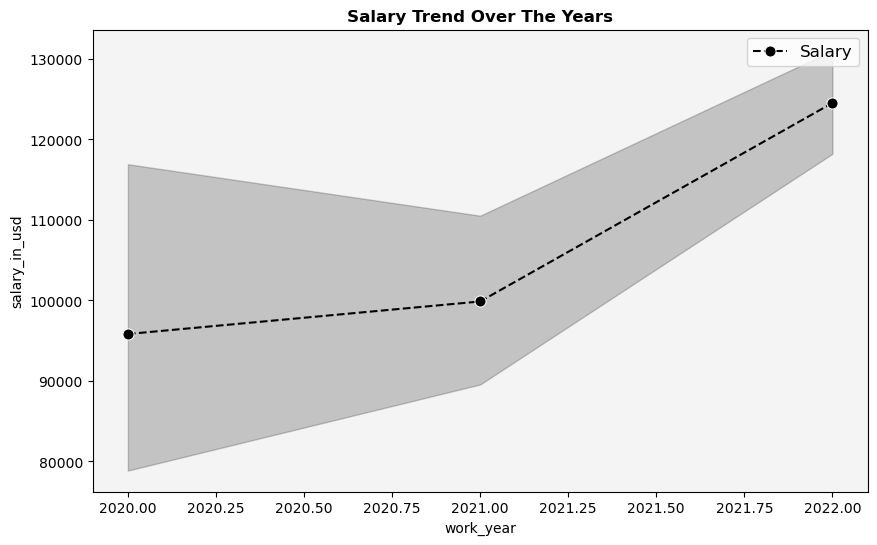

In [30]:
plt.figure(figsize = (10,6))
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='black', markersize=8 )
plt.title('Salary Trend Over The Years', fontsize=12, fontweight='bold')

# Customize the background color
p.set_facecolor("#f4f4f4")
plt.legend(['Salary'], loc='best', fontsize=12)

# Remove the grid lines
p.grid(False)

plt.show()

There wasn't much change in salary from 2020 to 2021.
Continual changes occurred in salary from 2021 to 2022.

C:\Users\himan\AppData\Local\Temp\ipykernel_11464\801920785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['experience_level'], y=df['salary_in_usd'], palette='magma', inner="quartile")


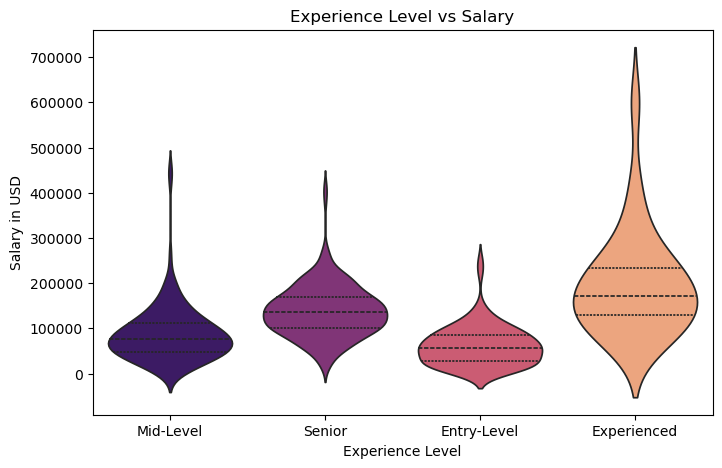

In [32]:
#Experience Level vs Salary
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['experience_level'], y=df['salary_in_usd'], palette='magma', inner="quartile")
plt.title('Experience Level vs Salary')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


Insights:
- More experience leads to higher pay, but the variation in salaries suggests that factors like company, location, and industry may also play a role.
- Some professionals earn significantly higher salaries, possibly due to niche expertise or leadership roles.
- Entry-level salaries are relatively low, reinforcing the need for experience and skill growth in the field.

C:\Users\himan\AppData\Local\Temp\ipykernel_11464\3570385752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['employment_type'], y=df['salary_in_usd'], palette='Set2')


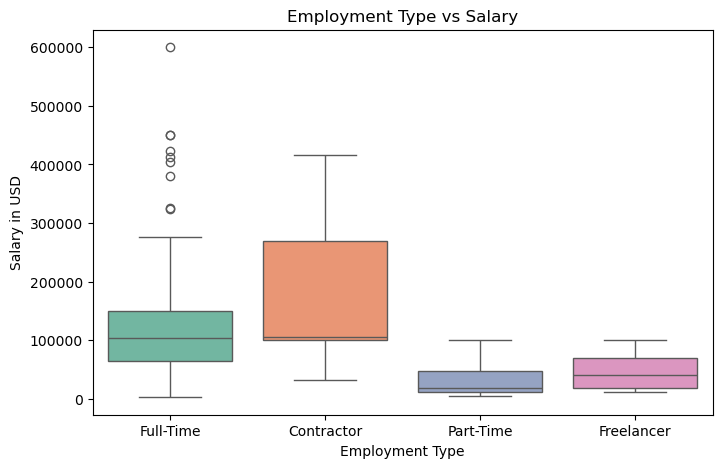

In [34]:
#Employment Type vs Salary
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['employment_type'], y=df['salary_in_usd'], palette='Set2')
plt.title('Employment Type vs Salary')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()


Insights: 
- Contractors earn the most but have the highest salary variation.
- Full-time employees have stable salaries with people with high-salaries than any others.
- Part-time and freelancers earn the least, with lower salary variability.

C:\Users\himan\AppData\Local\Temp\ipykernel_11464\697492340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['job_title'].isin(top_jobs)], x='job_title', y='salary_in_usd', palette='Blues_r')


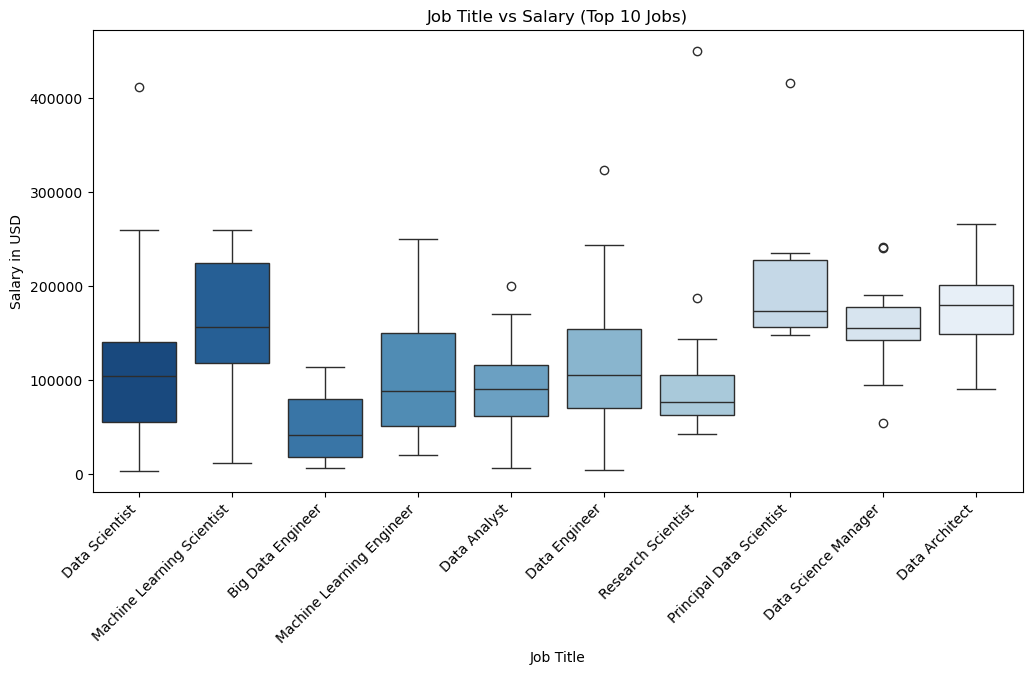

In [36]:
#Job Title vs Salary
plt.figure(figsize=(12, 6))
top_jobs = df['job_title'].value_counts().nlargest(10).index  # Top 10 job titles
sns.boxplot(data=df[df['job_title'].isin(top_jobs)], x='job_title', y='salary_in_usd', palette='Blues_r')
plt.xticks(rotation=45, ha='right')
plt.title('Job Title vs Salary (Top 10 Jobs)')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.show()


C:\Users\himan\AppData\Local\Temp\ipykernel_11464\1012680912.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_salaries.index, x=avg_salaries.values, palette='viridis')


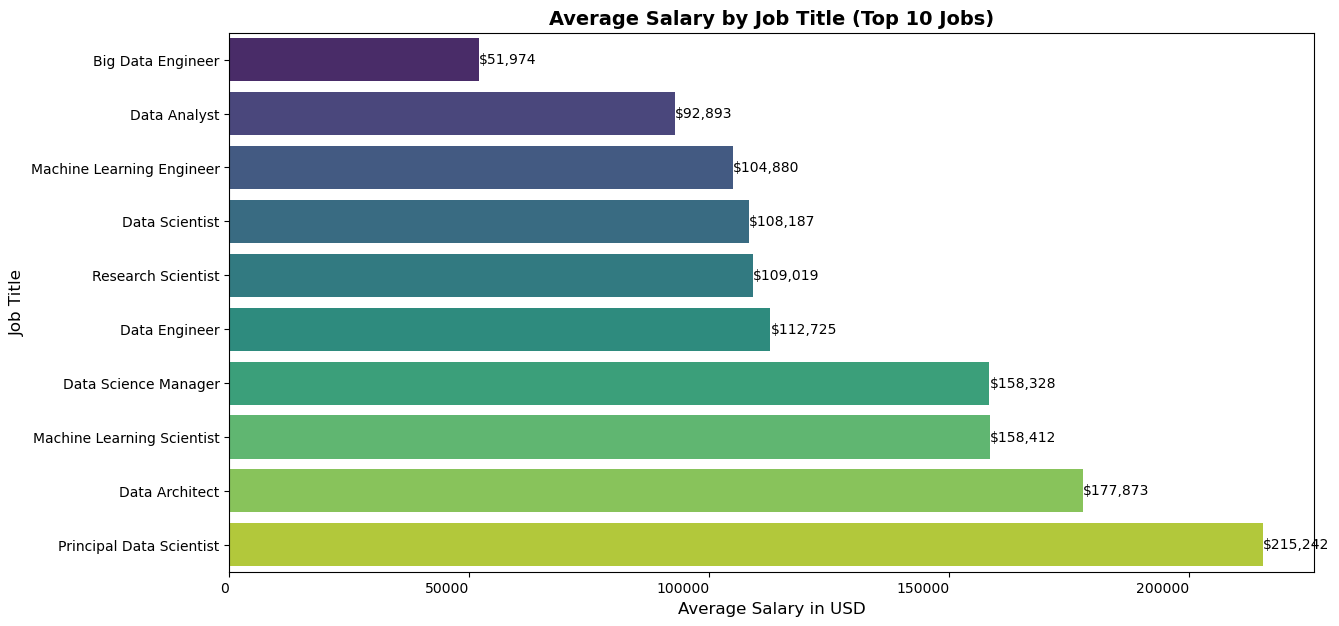

In [37]:
plt.figure(figsize=(14, 7))
avg_salaries = df[df['job_title'].isin(top_jobs)].groupby('job_title')['salary_in_usd'].mean().sort_values()

# horizontal bar plot
sns.barplot(y=avg_salaries.index, x=avg_salaries.values, palette='viridis')

# Add data labels
for index, value in enumerate(avg_salaries.values):
    plt.text(value, index, f"${int(value):,}", va='center', fontsize=10)

# Titles and labels
plt.title('Average Salary by Job Title (Top 10 Jobs)', fontsize=14, fontweight='bold')
plt.xlabel('Average Salary in USD', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(ha='right', fontsize=10)
plt.show()

Insights:
- Leadership and specialized roles (Data Science Manager, ML Scientist, Principal Data Scientist, Data Architect) have the highest salaries.
- Technical roles (Data Scientist, Data Engineer, ML engineer, Research Scientist) have decent but varied salaries.
- Entry-level roles (Data Analyst, Big Data Engineer) earn less but provide a stepping stone into higher-paying jobs.

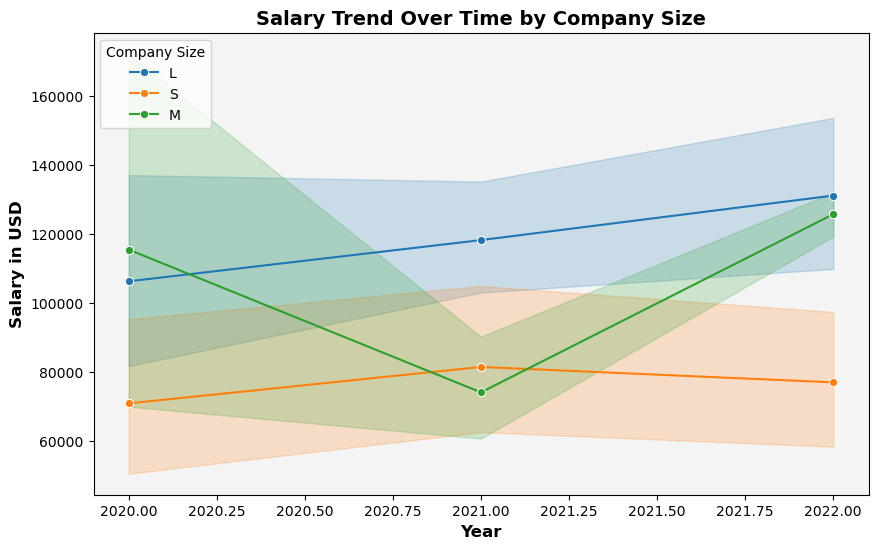

In [39]:
#Company Size vs Salary
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

# Add a legend
plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

# Add a title
plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')


# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()


The salary trend in medium-sized companies is increasing compared to small and large companies.
The salary line in large companies is not fluctuating as much as in medium-sized companies.

C:\Users\himan\AppData\Local\Temp\ipykernel_11464\3070237247.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['employee_residence'].isin(top_countries)], x='employee_residence', y='salary_in_usd', palette='viridis')


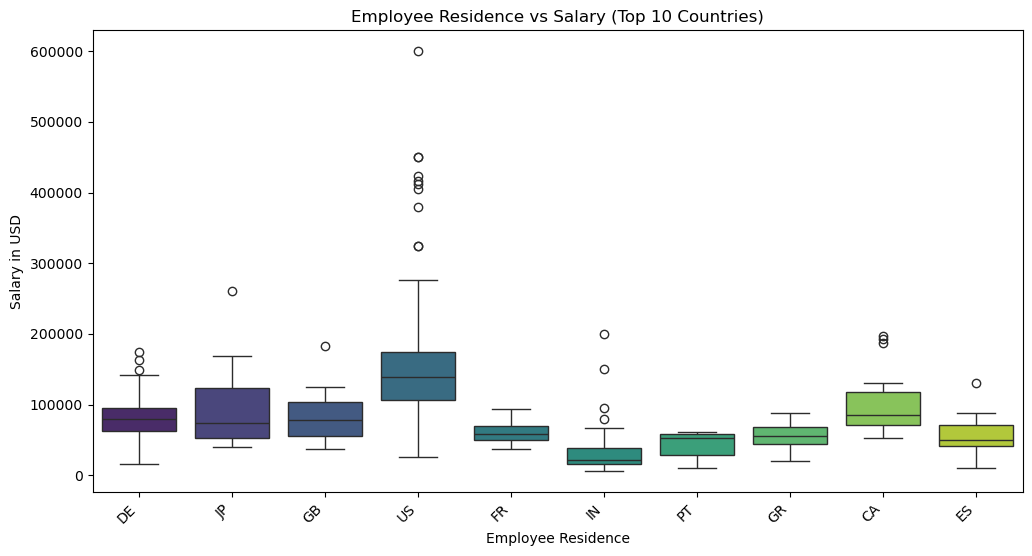

In [41]:
#Employee Residence vs Salary
plt.figure(figsize=(12, 6))
top_countries = df['employee_residence'].value_counts().nlargest(10).index  # Top 10 employee residence locations
sns.boxplot(data=df[df['employee_residence'].isin(top_countries)], x='employee_residence', y='salary_in_usd', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Employee Residence vs Salary (Top 10 Countries)')
plt.xlabel('Employee Residence')
plt.ylabel('Salary in USD')
plt.show()


C:\Users\himan\AppData\Local\Temp\ipykernel_11464\4130014928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['company_location'].isin(top_company_locations)], x='company_location', y='salary_in_usd', palette='crest')


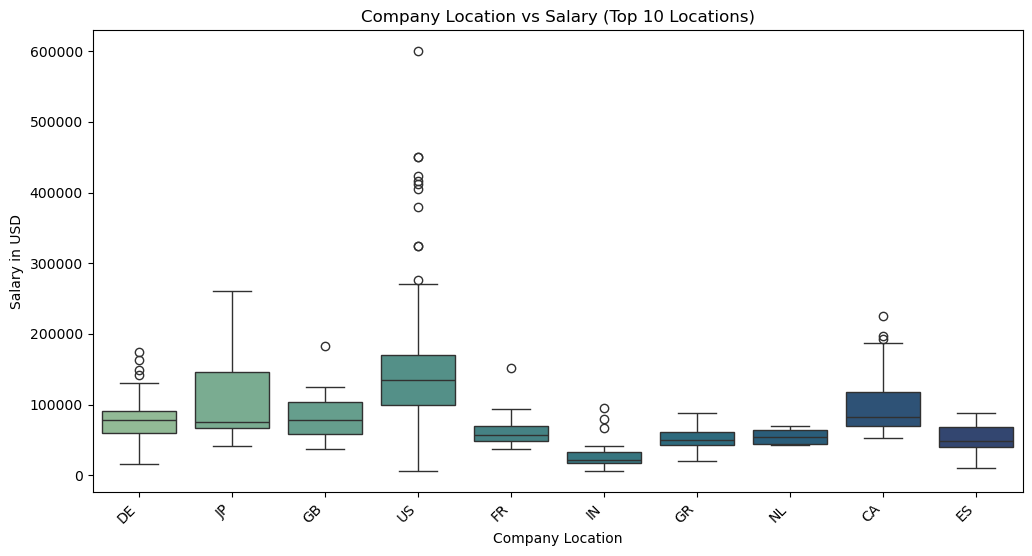

In [42]:
#Company Location vs Salary
plt.figure(figsize=(12, 6))
top_company_locations = df['company_location'].value_counts().nlargest(10).index  # Top 10 company locations
sns.boxplot(data=df[df['company_location'].isin(top_company_locations)], x='company_location', y='salary_in_usd', palette='crest')
plt.xticks(rotation=45, ha='right')
plt.title('Company Location vs Salary (Top 10 Locations)')
plt.xlabel('Company Location')
plt.ylabel('Salary in USD')
plt.show()


Insights:
- The US remains the best-paying location for data science jobs.
- European countries have stable salaries, but lower than the US.
- India, Greece, and Spain have the lowest salary ranges.
- Japan and Canada are promising locations for high-paying data jobs.

### Bonus

C:\Users\himan\AppData\Local\Temp\ipykernel_11464\4291825288.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette='viridis')


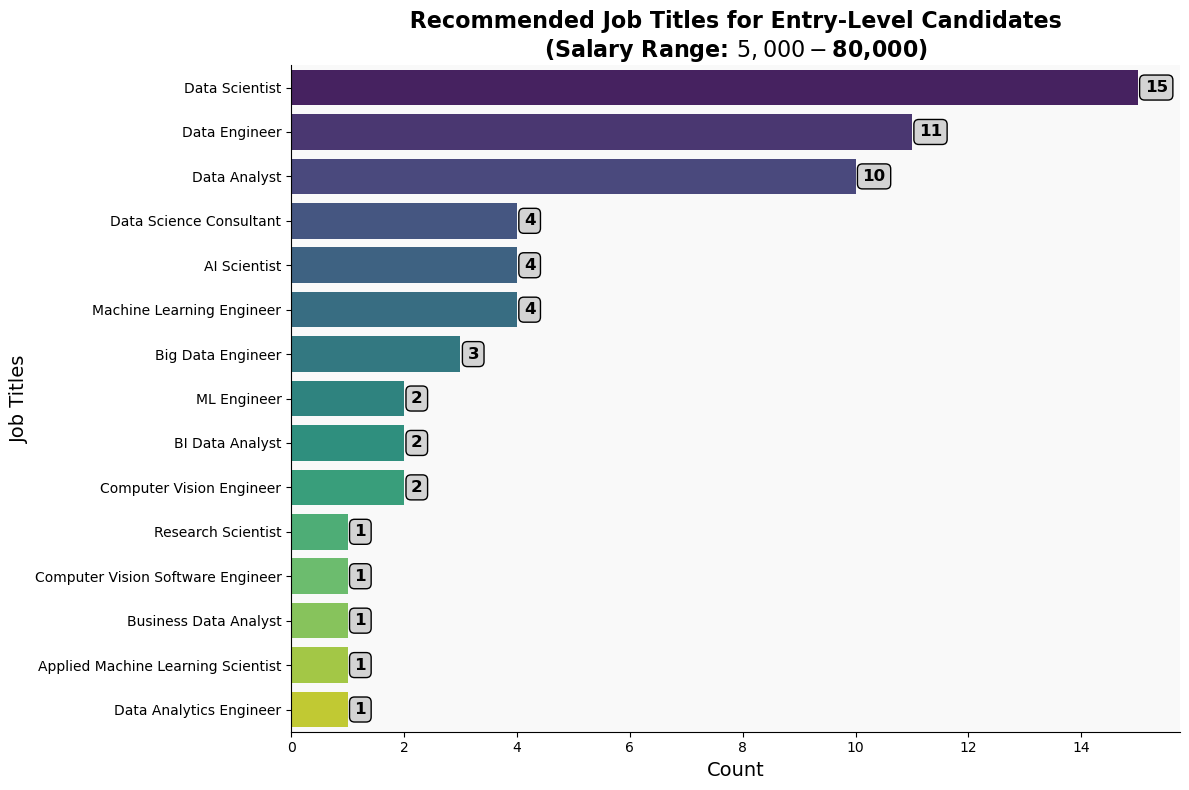

In [132]:
#Job Title Recommendation for Entry-level Candidates

# Define candidate criteria
desired_experience_level = 'Entry-Level'
desired_salary_range = (5000, 80000)  # Replace with the desired salary range in USD

# Filter the dataset based on experience level and desired salary range
filtered_df = df[(df['experience_level'] == desired_experience_level) &
                 (df['salary_in_usd'] >= desired_salary_range[0]) &
                 (df['salary_in_usd'] <= desired_salary_range[1])]

# Count occurrences of each job title and sort in descending order
job_title_counts = filtered_df['job_title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']
job_title_counts = job_title_counts.sort_values(by='Count', ascending=False)  # Sort for better readability

# Set up the figure
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette='viridis')

# Labels and Title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Job Titles', fontsize=14)
plt.title(f' Recommended Job Titles for {desired_experience_level} Candidates \n'
          f'(Salary Range: ${desired_salary_range[0]:,} - ${desired_salary_range[1]:,})', 
          fontsize=16, fontweight='bold')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black", fontsize=12, fontweight='bold',
                 padding=5, bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'lightgray', 'edgecolor': 'black'})

# Customize the background and grid
ax.set_facecolor("#f9f9f9")  # Light background
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.tight_layout()
plt.show()


For Entry-Level candidates seeking a salary range between 5,000 to 80,000 USD, the top recommended job titles are:

- Data Scientist 
- Data Engineer 
- Data Analyst 

C:\Users\himan\AppData\Local\Temp\ipykernel_11464\3980496876.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Job Title', data=merged_df, palette='viridis')


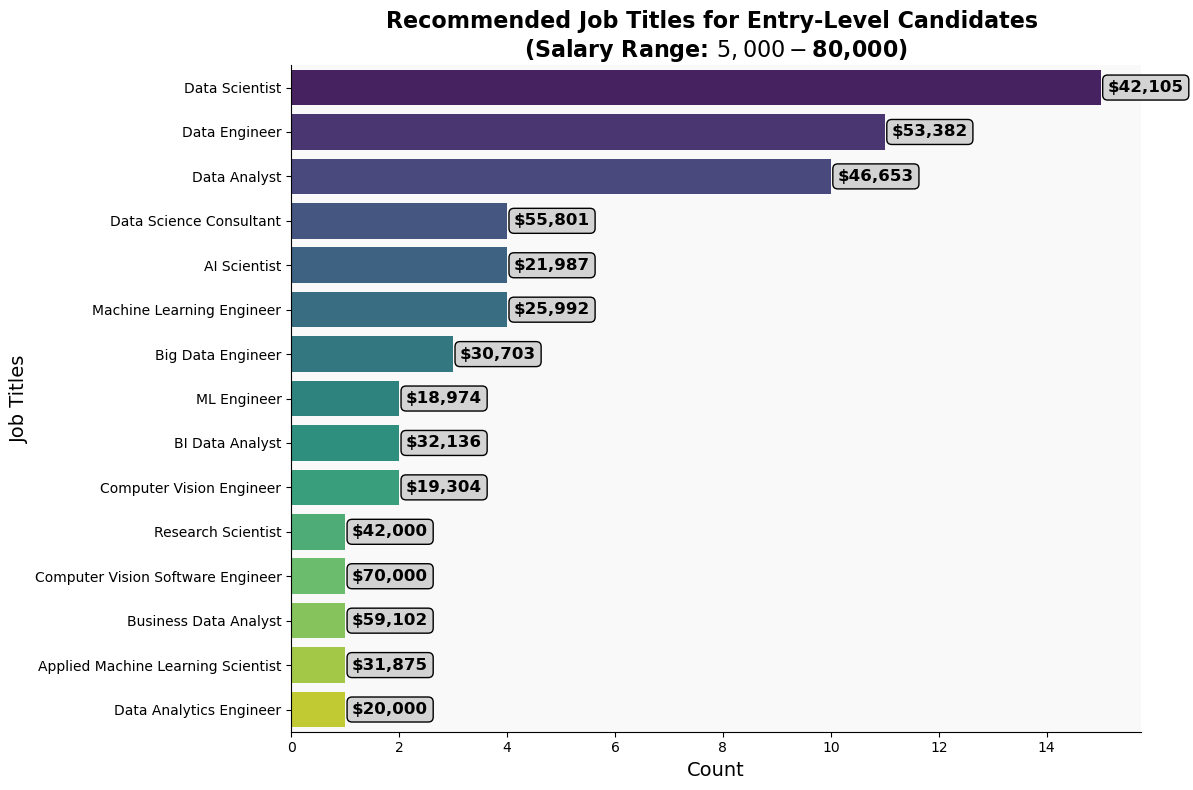

In [134]:
# Define candidate criteria
desired_experience_level = 'Entry-Level'
desired_salary_range = (5000, 80000)  # Replace with the desired salary range in USD

# Filter the dataset based on experience level and salary range
filtered_df = df[(df['experience_level'] == desired_experience_level) &
                 (df['salary_in_usd'] >= desired_salary_range[0]) &
                 (df['salary_in_usd'] <= desired_salary_range[1])]

# Count occurrences of each job title
job_title_counts = filtered_df['job_title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']

# Calculate average salary for each job title
avg_salary_per_title = filtered_df.groupby('job_title')['salary_in_usd'].mean().reset_index()
avg_salary_per_title.columns = ['Job Title', 'Average Salary']

# Merge count and average salary data
merged_df = job_title_counts.merge(avg_salary_per_title, on='Job Title')

# Sort by count in descending order
merged_df = merged_df.sort_values(by='Count', ascending=False)

# Set up the figure
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Count', y='Job Title', data=merged_df, palette='viridis')

# Labels and Title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Job Titles', fontsize=14)
plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates \n'
          f'(Salary Range: ${desired_salary_range[0]:,} - ${desired_salary_range[1]:,})', 
          fontsize=16, fontweight='bold')

# Add average salary labels on each bar
for container, salary in zip(ax.containers, merged_df['Average Salary']):
    ax.bar_label(container, labels=[f"${salary:,.0f}"], label_type="edge", color="black", fontsize=12, fontweight='bold',
                 padding=5, bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'lightgray', 'edgecolor': 'black'})

# Customize the background and grid
ax.set_facecolor("#f9f9f9")  # Light background
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.tight_layout()
plt.show()

## Feature Engineering

### Encoding Categorical Variables

In [49]:
# 1. Label Encoding (For Ordinal Categories)
from sklearn.preprocessing import LabelEncoder

# Example: Encoding Experience Level ('EN' -> 0, 'MI' -> 1, 'SE' -> 2, 'EX' -> 3)
experience_mapping = {'Entry-Level': 0, 'Mid-Level': 1, 'Senior': 2, 'Experienced': 3}
df['experience_level_encoded'] = df['experience_level'].map(experience_mapping)

# Encoding Company Size ('S' -> 0, 'M' -> 1, 'L' -> 2)
company_size_mapping = {'S': 0, 'M': 1, 'L': 2}
df['company_size_encoded'] = df['company_size'].map(company_size_mapping)

# Encoding Company Size ('FT' -> 0, 'CT' -> 1, 'FL' -> 2, 'PT' -> 3)
#employment_type_mapping = {'Full-Time': 0, 'Contractor': 1, 'Freelancer': 2, 'Part-Time': 3}
#df['employment_type_encoded'] = df['employment_type'].map(company_size_mapping)

df[['experience_level', 'experience_level_encoded', 'company_size', 'company_size_encoded']].head()


,experience_level,experience_level_encoded,company_size,company_size_encoded
0,Mid-Level,1,L,2
1,Senior,2,S,0
2,Senior,2,M,1
3,Mid-Level,1,S,0
4,Senior,2,L,2


In [50]:
#2. One-Hot Encoding (For Non-Ordinal Categories)
# One-Hot Encoding for 'employment_type' and 'company_location'
df = pd.get_dummies(df, columns=['employment_type', 'company_location'], drop_first=True)

df.head()


,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_size,experience_level_encoded,...,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,2020,Mid-Level,Data Scientist,70000,EUR,79833,DE,0,L,1,...,False,False,False,False,False,False,False,False,False,False
1,2020,Senior,Machine Learning Scientist,260000,USD,260000,JP,0,S,2,...,False,False,False,False,False,False,False,False,False,False
2,2020,Senior,Big Data Engineer,85000,GBP,109024,GB,50,M,2,...,False,False,False,False,False,False,False,False,False,False
3,2020,Mid-Level,Product Data Analyst,20000,USD,20000,HN,0,S,1,...,False,False,False,False,False,False,False,False,False,False
4,2020,Senior,Machine Learning Engineer,150000,USD,150000,US,50,L,2,...,False,False,False,False,False,False,False,False,True,False


### Creating New Features

In [52]:
#1. Creating a Log-Transformed Salary Feature
df['log_salary'] = np.log1p(df['salary_in_usd'])  # log(1 + x) to handle zeros
df[['salary_in_usd', 'log_salary']].head()

,salary_in_usd,log_salary
0,79833,11.287705
1,260000,12.468441
2,109024,11.599332
3,20000,9.903538
4,150000,11.918397


In [53]:
#2. Creating a Salary per Year Feature
df['salary_per_year'] = df['salary_in_usd'] / (2025 - df['work_year'])
df[['work_year', 'salary_in_usd', 'salary_per_year']].tail()


,work_year,salary_in_usd,salary_per_year
602,2022,154000,51333.333333
603,2022,126000,42000.000000
604,2022,129000,43000.000000
605,2022,150000,50000.000000
606,2022,200000,66666.666667


In [54]:
#3. Creating a Remote Work Indicator
df['is_fully_remote'] = (df['remote_ratio'] == 100).astype(int)
df[['remote_ratio', 'is_fully_remote']].head()


,remote_ratio,is_fully_remote
0,0,0
1,0,0
2,50,0
3,0,0
4,50,0


In [55]:
#4. Salary Bucket Categorization
df['salary_category'] = pd.cut(df['salary_in_usd'], bins=[0, 70000, 150000, np.inf], labels=['Low', 'Medium', 'High'])
df[['salary_in_usd', 'salary_category']].head()


,salary_in_usd,salary_category
0,79833,Medium
1,260000,High
2,109024,Medium
3,20000,Low
4,150000,Medium


### Handling Skewed Data

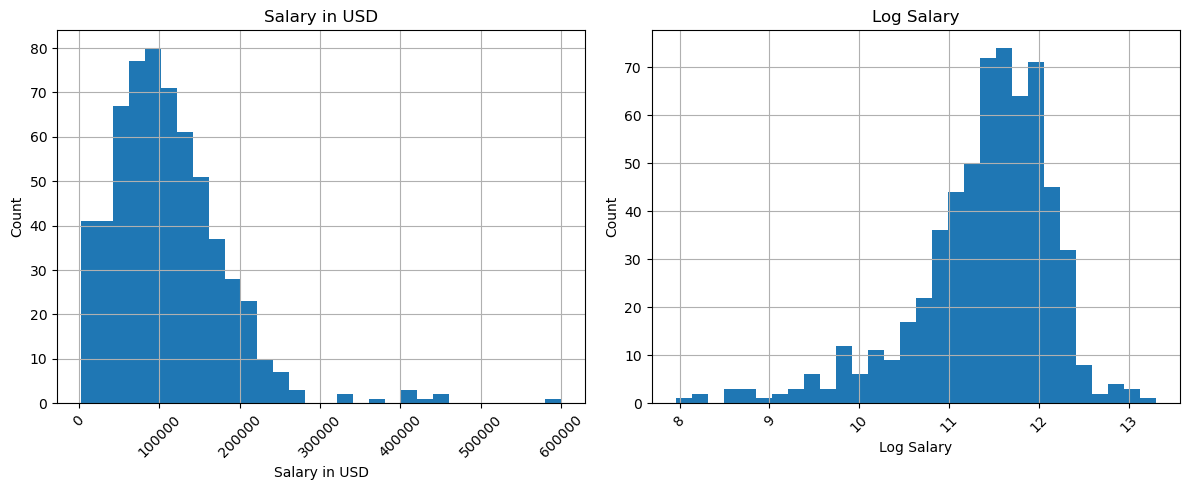

In [57]:
#1. Checking Skewness
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df['salary_in_usd'].hist(bins=30, ax=axes[0])
axes[0].set_title('Salary in USD')
axes[0].set_xlabel('Salary in USD')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

df['log_salary'].hist(bins=30, ax=axes[1])
axes[1].set_title('Log Salary')
axes[1].set_xlabel('Log Salary')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

In [58]:
from scipy.stats import skew

print("Skewness before transformation:", skew(df['salary_in_usd']))
print("Skewness after log transformation:", skew(df['log_salary']))


Skewness before transformation: 1.6634213360977623
Skewness after log transformation: -1.2577824363853118


 If skewness > 1, it's highly skewed, and transformation is needed.

In [60]:
#2. Applying Box-Cox Transformation: Works for positive values
from scipy.stats import boxcox

df['salary_boxcox'], lambda_val = boxcox(df['salary_in_usd'] + 1)  # Adding 1 to avoid zero values
print(f"Box-Cox Lambda Value: {lambda_val}")
df[['salary_in_usd', 'salary_boxcox']].head()


Box-Cox Lambda Value: 0.44304204312460393


,salary_in_usd,salary_boxcox
0,79833,333.040441
1,260000,563.482576
2,109024,382.680990
3,20000,179.337004
4,150000,441.129299


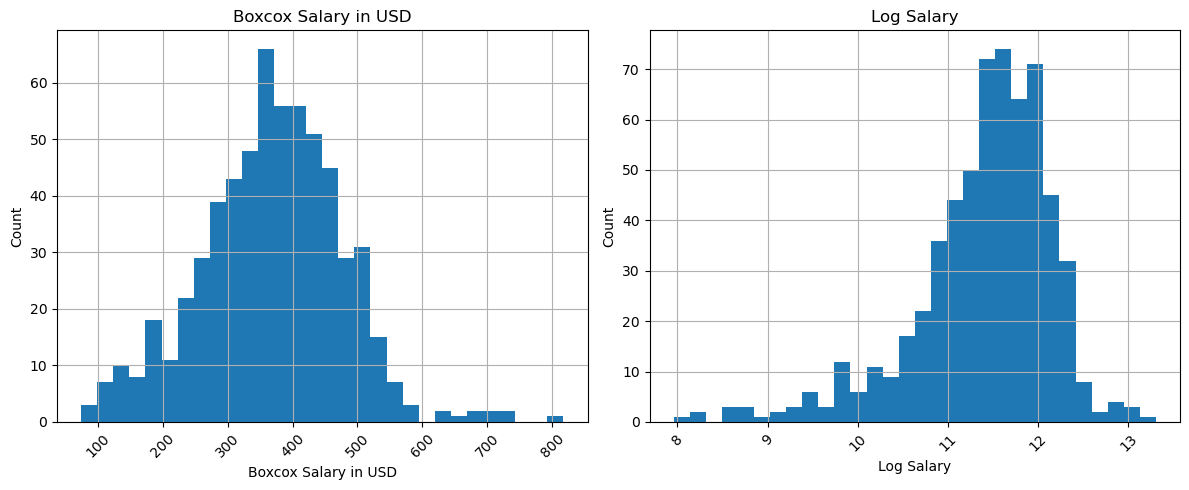

In [61]:
#1. Checking Skewness
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df['salary_boxcox'].hist(bins=30, ax=axes[0])
axes[0].set_title('Boxcox Salary in USD')
axes[0].set_xlabel('Boxcox Salary in USD')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

df['log_salary'].hist(bins=30, ax=axes[1])
axes[1].set_title('Log Salary')
axes[1].set_xlabel('Log Salary')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

### Modeling 

In [63]:
df.columns

Index(['work_year', 'experience_level', 'job_title', 'salary',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_size', 'experience_level_encoded',
       'company_size_encoded', 'employment_type_Freelancer',
       'employment_type_Full-Time', 'employment_type_Part-Time',
       'company_location_AS', 'company_location_AT', 'company_location_AU',
       'company_location_BE', 'company_location_BR', 'company_location_CA',
       'company_location_CH', 'company_location_CL', 'company_location_CN',
       'company_location_CO', 'company_location_CZ', 'company_location_DE',
       'company_location_DK', 'company_location_DZ', 'company_location_EE',
       'company_location_ES', 'company_location_FR', 'company_location_GB',
       'company_location_GR', 'company_location_HN', 'company_location_HR',
       'company_location_HU', 'company_location_IE', 'company_location_IL',
       'company_location_IN', 'company_location_IQ', 'company_location_

In [64]:
# Selecting relevant features
numerical_features = ['work_year', 'experience_level_encoded', 'remote_ratio', 'company_size_encoded', 'is_fully_remote']
categorical_features = [col for col in df.columns if col.startswith(('employment_type_', 'company_location_'))]

In [65]:
# Define feature matrix and target variable
X = df[numerical_features + categorical_features]
y = df['salary_boxcox']  # Target variable (normalized salary)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [67]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Scale numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [69]:

# Model initialization
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}


In [70]:
# Training and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2 Score': r2_score(y_test, y_pred)
    }

In [71]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                         MAE          MSE       RMSE  R2 Score
Linear Regression  54.065140  5361.743853  73.223930  0.521414
Ridge Regression   49.705779  4555.718142  67.496060  0.593359
Lasso Regression   49.834473  4602.111230  67.838862  0.589218
Random Forest      54.286213  5603.642377  74.857480  0.499822
XGBoost            55.235290  5966.747303  77.244723  0.467412


From the results, Ridge Regression performed the best.
- Lowest MAE (49.70) → Most accurate predictions on average.
- Lowest MSE (4555.71) & RMSE (67.49) → Smaller errors overall.
- Highest R² Score (0.5933) → Explains ~59.3% of variance in salary.